In [184]:
import pandas as pd
import numpy as np
from nltk.stem import SnowballStemmer

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
 

In [185]:
quora_df = pd.read_csv("./train.csv")[0:40000]
del quora_df["id"]

In [148]:
quora_df.head()

qid1  qid2                                          question1  \
0     1     2  What is the step by step guide to invest in sh...   
1     3     4  What is the story of Kohinoor (Koh-i-Noor) Dia...   
2     5     6  How can I increase the speed of my internet co...   
3     7     8  Why am I mentally very lonely? How can I solve...   
4     9    10  Which one dissolve in water quikly sugar, salt...   

                                           question2  is_duplicate  
0  What is the step by step guide to invest in sh...             0  
1  What would happen if the Indian government sto...             0  
2  How can Internet speed be increased by hacking...             0  
3  Find the remainder when [math]23^{24}[/math] i...             0  
4            Which fish would survive in salt water?             0

In [149]:
quora_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 5 columns):
qid1            40000 non-null int64
qid2            40000 non-null int64
question1       40000 non-null object
question2       40000 non-null object
is_duplicate    40000 non-null int64
dtypes: int64(3), object(2)
memory usage: 1.5+ MB


In [150]:
X = quora_df[["question1", "question2"]]
y = quora_df.is_duplicate

In [151]:
print (quora_df.shape)
print (X.shape)

(40000, 5)
(40000, 2)


# Feature Engineering

In [152]:
#stemmer = SnowballStemmer('english')

def clean_text(text_data):
    """clean text from punctuation"""
    #text_data = str(text_data).decode("utf-8")

    text_data = text_data.lower()
    
    for punc in "@#^*():,'/.":
        text_data = str(text_data).replace(punc, "").replace("\n","")

    #text_data = text_data.encode('ascii',errors='ignore')
    #stemmed_words = [stemmer.stem(word) for word in text_data.split()]
    #review_text = " ".join(stemmed_words)
    
    return text_data
X.question1 = X.question1.apply(lambda q: clean_text(q))
X.question2 = X.question2.apply(lambda q: clean_text(q))

/Users/Stav/anaconda2/envs/python3/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [ ]:
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(np.concatenate(X.question1,X.question2))
freq_term_matrix = count_vectorizer.transform(np.concatenate(X.question1, question2))
tfidf = TfidfTransformer(norm="l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.transform(freq_term_matrix)



In [190]:
questions = np.vstack((X.question1, X.question2))
questions = questions.reshape(X.shape[0],2)


vectorizer = TfidfVectorizer()
def cosine_sim(q):
    text1 = q[0]
    text2 = q[1]
    
    #print(text1, text2)
    tfidf = vectorizer.fit_transform([text1, text2])
    return ((tfidf * tfidf.T).A)[0,1]

cosine_sim_vect = [cosine_sim(q) for q in questions]
X["cosine_sim"] = pd.Series(cosine_sim_vect)

# named entity recognition

KeyError: 0

In [170]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33)

In [189]:
from xgboost import XGBClassifier
from sklearn.metrics import log_loss

clf = RandomForestClassifier()

clf.fit(X_train.cosine_sim.reshape(-1,1), y_train)

y_pred = clf.predict(X_test.cosine_sim.reshape(-1,1))

print ("log_loss:" ,log_loss(y_test,y_pred))


#cosine_sim_vect

ModuleNotFoundError: No module named 'xgboost'

In [188]:
X.cosine_sim.describe()

count    40000.000000
mean         0.049369
std          0.062781
min          0.000000
25%          0.000000
50%          0.036259
75%          0.077809
max          1.000000
Name: cosine_sim, dtype: float64

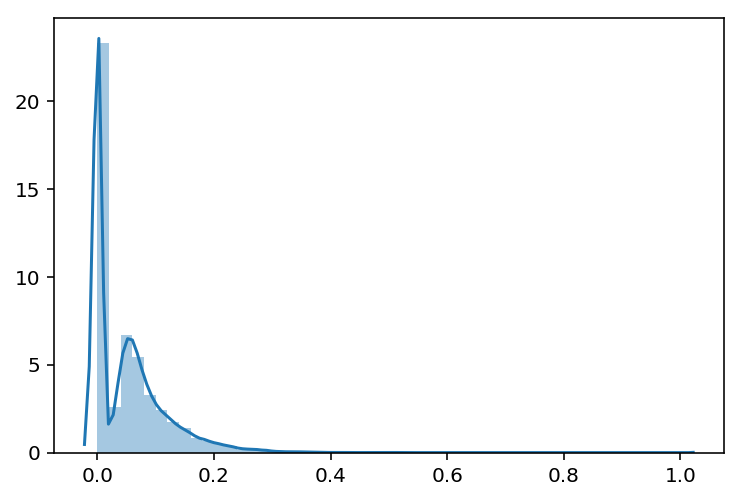

In [186]:
import seaborn as sns
sns.distplot(cosine_sim_vect)

In [ ]:
# name entity recognition, levenshtein on names

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

sparse_tfidf_vectors = tfidf.fit_transform(X)

In [11]:
tfidf_vectors = pd.DataFrame(sparse_tfidf_vectors.todense())

In [23]:
tfidf_vectors.todense()

matrix([[ 1.,  0.],
        [ 0.,  1.]])

In [13]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33)

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

tfidf.fit_transform(X_train)

<2x2 sparse matrix of type '<class 'numpy.float64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [18]:
X_train

question1  \
345059                  What is it like living in Russia?   
393058  What is the most pedophillish question you've ...   
304458              How do I reduce cellulite on my butt?   
312416                                  What is a vector?   
4942    What prevented Harry Potter from becoming an O...   
283072  What are some statistics on the use of Apple's...   
309994  Can anybody change the outcome of the election...   
358446            How can one prove the existence of God?   
228554  Is there a paranormal event that you have expe...   
312454  What products should I use to get rid of acne ...   
150733        How can I reset my password from Instagram?   
372064  What are all the govt jobs for mechanical engi...   
275738             What are typical surnames of Brahmins?   
179699  Why do so many people ask questions on Quora t...   
126900  Why u.s.a always win more gold medals than oth...   
68410   What are good questions to ask your professor ...   
197918    Why is Saltwater Taffy candy imported in Italy?   
94406   Is learning MATLAB necessary for civil engineers?   
183105  Why do many people consider Age of Empires II ...   
236195  Does your hpta recover partially or completely...   
262572  What is the weirdest thing you've ever been told?   
41178   What are the meanings of Punjabi words 'Varga'...   
257855  Puzzles and Trick Questions: How would you com...   
333660  After how long can I change my youtube channel...   
31578              What is a rough endoplasmic reticulum?   
131249  What supporting documents are required for a B...   
297873  If I have an iCloud, can I delete all the phot...   
311355  What is the best gift you have recieved from s...   
61688                    What's the meaning of "growell"?   
256883      Why aren't most Muslim countries like Turkey?   
...                                                   ...   
366589       How can you reduce your alcohol consumption?   
186453  What was (for you) the craziest thing(s) you'v...   
350031          How do you fix an HP monitor OSD lockout?   
156498                 When should I give up on my dream?   
152407  What is the difference between tf-idf and Delt...   
10310   How big is the approximate area affected by th...   
310891  How can I meet our Prime Minister Mr. Narendra...   
296935  Does Uber charge your account after you arrive...   
163019  How can I download game of thrones season 5 ep...   
234997        How do I overcome my pornography addiction?   
220517                                  Does he like me ?   
254981     How are insurance agents compensated in India?   
228773                 Is there proof of alien life form?   
79080   Which would be the best classification group f...   
121556  What would happen if, hypothetically, every si...   
369314   Have you ever married a person you met on Quora?   
52                                  Nd she is always sad?   
239546  How can I avoid that Gitbook prints the name o...   
309077  How do I recover deleted emails in my gmail ac...   
65640   What are the accounting doubts with Itochu Cor...   
11464   Friction from my iPhone is hurting my hands - ...   
273096              How do I improve my English language?   
128489  Where does the expression 'paying through the ...   
209419  What do the colors represent on the Mexican flag?   
187304  I don't know my PF account number. How could I...   
339534                                  What is an essay?   
319440             Should I upgrade to Windows 10 from 7?   
352025  Why does the US need Freddie Mac and Fannie Ma...   
292938                    How do I start online business?   
333334            What is your personal feeling on pizza?   

                                                question2  
345059   What is it like living in Russia as a foreigner?  
393058  What is the most unusual question ever asked o...  
304458          How do I get rid of cellulite on my butt?  
312416                   